# Data Preparation
Initial Setup
First, necessary libraries and functionalities are imported:

In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Load the dataset (replace 'employee_data.csv' with your actual dataset)
data = pd.read_csv(r'C:\Internship Program(Technohacks)\Task-002\WA_Fn-UseC_-HR-Employee-Attrition.csv')

Now that the data is loaded, some features of the data can be explored:

In [15]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [17]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [18]:
data.describe

<bound method NDFrame.describe of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education Educati

In [19]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

The dataset includes 35 columns of both numeric (26 variables) and categorical data (9 variables). There are 1470 entries in total, and, significantly, no null values in the dataset - this is valuable, as the random forest algorithm cannot process null values and these missing values would need to be addressed.

# Data Cleaning

The first step of data cleaning will be to remove personally identifying information, as well as any variables that, if used to make predictions or business decisions, might be considered discriminatory.

In this case 'employee number', 'age', 'gender', and 'marital status' are dropped from the dataset.

In [20]:
data.drop(['EmployeeNumber','Age','Gender','MaritalStatus'],axis=1,inplace=True)

Each of the remaining variables is examined to determine if any can be removed as having no predictive value.

Each variable is determined to be either numeric or categorical, then either the range of numbers or the categorical values are listed:

In [21]:
for attribute in data.columns:
    print(attribute)
    if data[attribute].dtype == object:
        print('Categorical.  Values: {}\n'.format(data[attribute].unique()))
    else:
        print('Numeric.  Range: {} to {}\n'.format(data[attribute].min(),data[attribute].max()))

Attrition
Categorical.  Values: ['Yes' 'No']

BusinessTravel
Categorical.  Values: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

DailyRate
Numeric.  Range: 102 to 1499

Department
Categorical.  Values: ['Sales' 'Research & Development' 'Human Resources']

DistanceFromHome
Numeric.  Range: 1 to 29

Education
Numeric.  Range: 1 to 5

EducationField
Categorical.  Values: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

EmployeeCount
Numeric.  Range: 1 to 1

EnvironmentSatisfaction
Numeric.  Range: 1 to 4

HourlyRate
Numeric.  Range: 30 to 100

JobInvolvement
Numeric.  Range: 1 to 4

JobLevel
Numeric.  Range: 1 to 5

JobRole
Categorical.  Values: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']

JobSatisfaction
Numeric.  Range: 1 to 4

MonthlyIncome
Numeric.  Range: 1009 to 19999

MonthlyRate
Numeric.  Rang

The variables 'employee count', 'over 18', and 'standard hours' have the same value for all employees and thus have no predictive value.

These variables are dropped from the dataset:

In [22]:
data.drop(['EmployeeCount','Over18','StandardHours'],axis=1,inplace=True)

In [23]:
data.head()

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,94,3,...,3,1,0,8,0,1,6,4,0,5
1,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,61,2,...,4,4,1,10,3,3,10,7,1,7
2,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,92,2,...,3,2,0,7,3,3,0,0,0,0
3,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,56,3,...,3,3,0,8,3,3,8,7,3,0
4,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,40,3,...,3,4,1,6,3,3,2,2,2,2


# Data preprocessing

Assuming 'Attrition' is the target variable

In [37]:
X = data.drop('Attrition', axis=1)  # Features
y = data['Attrition']               # Target variable


Convert categorical variables into dummy/indicator variables

In [38]:
X = pd.get_dummies(X)

Split the data into training and testing sets (70% train, 30% test)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Feature scaling

In [41]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Train the Random Forest classifier with hyperparameter tuning

In [42]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [43]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [44]:
best_rf = grid_search.best_estimator_

Making predictions on the test set

In [45]:
y_pred = best_rf.predict(X_test_scaled)

Evaluating the model

In [47]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

          No       0.88      0.99      0.93       380
         Yes       0.78      0.11      0.20        61

    accuracy                           0.87       441
   macro avg       0.83      0.55      0.57       441
weighted avg       0.86      0.87      0.83       441

Confusion Matrix:
[[378   2]
 [ 54   7]]


# Exploratory Data Analysis
Visualize the confusion matrix

'Attrition' is the target variable (the variable the model will be created to predict). A simple count plot of this variable:

<Axes: xlabel='Attrition', ylabel='count'>

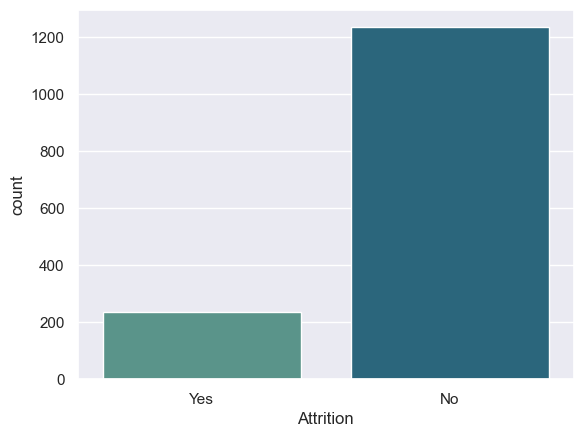

In [52]:
import seaborn as sns
sns.set_theme()  # sets the default seaborn theme
sns.countplot(data=data, x='Attrition', hue='Attrition', palette='crest', legend=False)

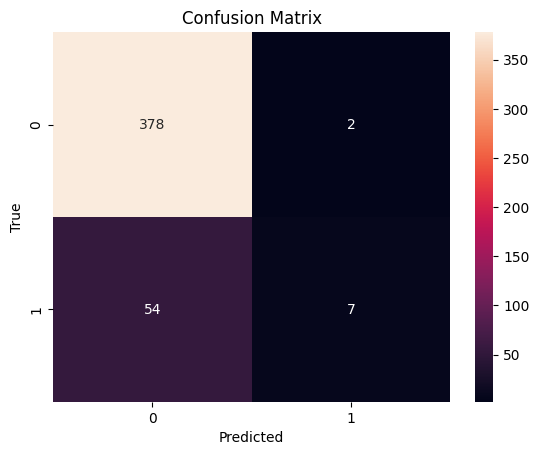

In [48]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Feature importance

In [49]:
feature_importance = best_rf.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(feature_importance)

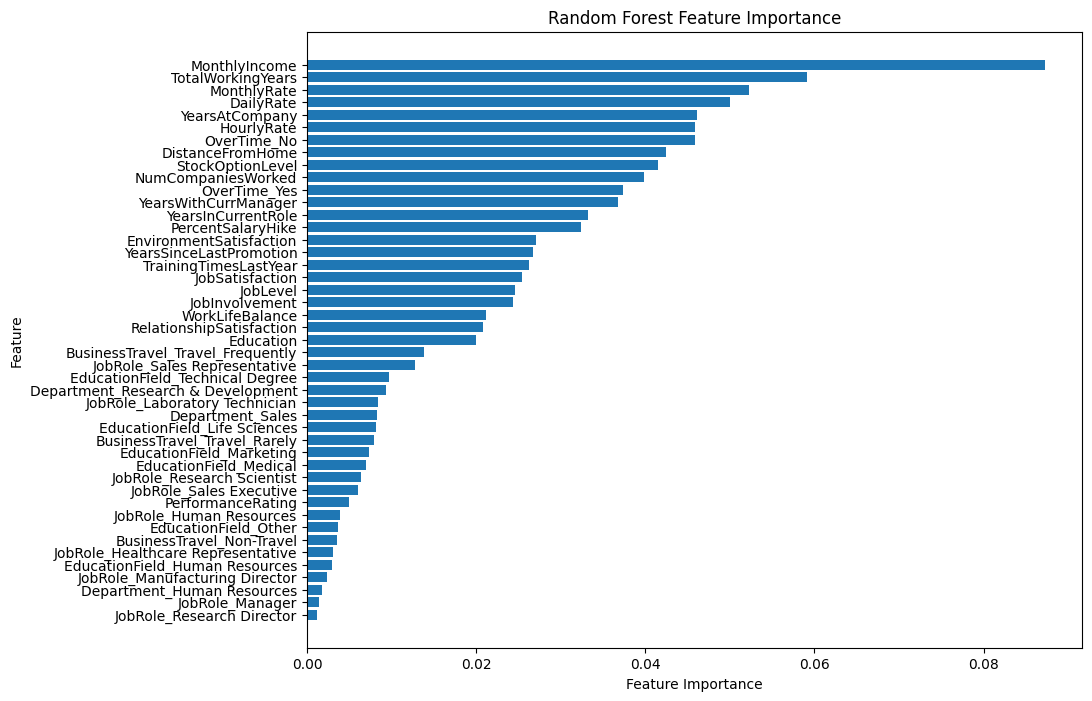

In [50]:
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

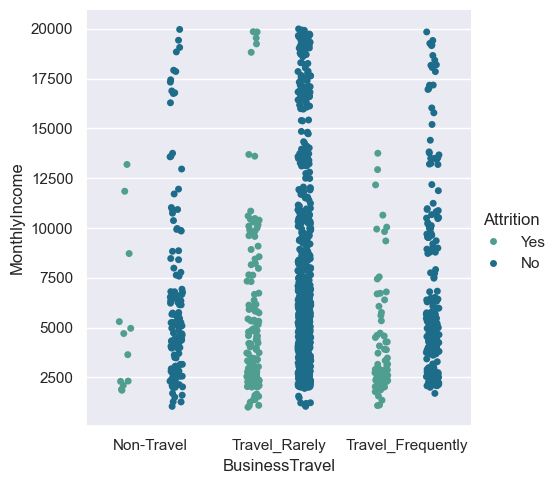

In [54]:
sns.catplot(data=data,x='BusinessTravel',y='MonthlyIncome',hue='Attrition',order=['Non-Travel','Travel_Rarely','Travel_Frequently'],dodge=True,palette='crest')

# Data Wrangling

The dataset must be prepared for machine learning by converting the remaining categorical variables into a numeric form for use.

The following is a list of the categorical variables:



In [55]:
for attribute in data.columns:
    if data[attribute].dtype == object:
        print('{} : {}\n'.format(attribute,data[attribute].unique()))

Attrition : ['Yes' 'No']

BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Department : ['Sales' 'Research & Development' 'Human Resources']

EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']

OverTime : ['Yes' 'No']



Of these categorical variables, we can see that two are ordinal - they have a ranking or ordering to the categories.

We can therefore convert these columns, 'BusinessTravel' and 'OverTime', directly to numeric values:

In [56]:
data['OverTime'] = data['OverTime'].apply(lambda val: 1 if val == 'Yes' else 0)

In [57]:
def convert_travel(value):
    if value == 'Non-Travel':
        return 0
    elif value == 'Travel_Rarely':
        return 1
    else:
        return 2
    

In [58]:
data['BusinessTravel'] = data['BusinessTravel'].apply(convert_travel)

The remaining categorical variables are nominal - there is no ranking or ordering to the categories.

These variables will be converted to numeric values using dummy variables:

In [59]:
data_final = pd.get_dummies(data=data,columns=['Department','EducationField','JobRole'],drop_first=True)

In [60]:
data_final.to_csv('Machine-Learning-Employee-Attrition.csv',index=False) #save dataset as csv for future use
data_final.describe()

,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,1.086395,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,0.532170,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,0.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,2.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#The dataset, now including 40 features, is ready for use in a machine learning algorithm